In [27]:
import pandas as pd
import os
import gensim
from sklearn import manifold, datasets

In [3]:
os.chdir('D:/学习资料/w2v kaggle')

In [6]:
df = pd.read_csv("train/train.csv")
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [13]:
df[df.is_duplicate!=0]

,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1
...,...,...,...,...,...,...
404280,404280,537922,537923,What are some outfit ideas to wear to a frat p...,What are some outfit ideas wear to a frat them...,1
404281,404281,99131,81495,Why is Manaphy childish in Pokémon Ranger and ...,Why is Manaphy annoying in Pokemon ranger and ...,1
404282,404282,1931,16773,How does a long distance relationship work?,How are long distance relationships maintained?,1
404284,404284,537926,537927,What does Jainism say about homosexuality?,What does Jainism say about Gays and Homosexua...,1


In [10]:
def read_questions(row,column_name):
    return gensim.utils.simple_preprocess(str(row[column_name]).encode('utf-8'))
    
documents = []
for index, row in df.iterrows():
    documents.append(read_questions(row,"question1"))
    if row["is_duplicate"] == 0:
        documents.append(read_questions(row,"question2"))

In [14]:
print("List of lists. Let's confirm: ", type(documents), " of ", type(documents[0]))

List of lists. Let's confirm:  <class 'list'>  of  <class 'list'>


In [19]:
len(documents)

659317

In [17]:
model = gensim.models.Word2Vec(size=150, window=10, min_count=2, sg=1, workers=10)
model.build_vocab(documents)  # prepare the model vocabulary

In [18]:
model.train(sentences=documents, total_examples=len(documents), epochs=model.iter)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


(25465648, 35144510)

In [20]:
word_vectors = model.wv
count = 0
for word in word_vectors.vocab:
    if count<10:
        print(word)
        count += 1
    else:
        break

what
is
the
step
by
guide
to
invest
in
share


In [22]:
len(word_vectors.vocab)

47336

In [23]:
vector = model.wv["immigration"]  # numpy vector of a word
len(vector)

150

In [24]:
vector

array([-0.25191367, -0.02799858, -0.15073036,  0.04868467,  0.5284479 ,
       -0.64226574,  0.18766026, -0.0907938 , -0.46169063,  0.5726536 ,
        0.1656834 ,  0.0400943 , -0.3067293 , -0.58253026, -0.3559638 ,
        0.04842531,  0.16947259, -0.22331204, -0.20321561, -0.0380627 ,
        0.48531908,  0.23873797, -0.36215043,  0.2021394 , -0.5436542 ,
        0.04908365,  0.4445744 ,  0.5413018 ,  0.13863544, -0.34487286,
       -0.4110999 , -0.05747535, -0.30890837,  0.17287   ,  0.21310034,
       -0.2925808 ,  0.46872512,  0.43334678,  0.20295928,  0.3810604 ,
        0.10093897, -0.19137011,  0.11026847, -0.04214545,  0.28576815,
        0.11892281,  0.3307407 ,  0.04205727, -0.31334224,  0.46603468,
        0.28390753, -0.75928307, -0.8602624 ,  0.26600996,  0.06837343,
        0.53394884, -0.22179963,  0.1705253 ,  0.52850765,  0.45267555,
       -0.11282887,  0.19068198,  0.8846484 , -0.47691754,  0.11081561,
        0.10067139, -0.16819775,  0.03175551,  0.0116802 , -0.34

In [25]:
wanted_words = []
count = 0
for word in word_vectors.vocab:
    if count<150:
        wanted_words.append(word)
        count += 1
    else:
        break
wanted_vocab = dict((k, word_vectors.vocab[k]) for k in wanted_words if k in word_vectors.vocab)
wanted_vocab

{'what': <gensim.models.keyedvectors.Vocab at 0x2c3e1d48518>,
 'is': <gensim.models.keyedvectors.Vocab at 0x2c384d79358>,
 'the': <gensim.models.keyedvectors.Vocab at 0x2c384d79cf8>,
 'step': <gensim.models.keyedvectors.Vocab at 0x2c384d79f98>,
 'by': <gensim.models.keyedvectors.Vocab at 0x2c384d285f8>,
 'guide': <gensim.models.keyedvectors.Vocab at 0x2c384d284e0>,
 'to': <gensim.models.keyedvectors.Vocab at 0x2c384d28710>,
 'invest': <gensim.models.keyedvectors.Vocab at 0x2c384d28860>,
 'in': <gensim.models.keyedvectors.Vocab at 0x2c384d28198>,
 'share': <gensim.models.keyedvectors.Vocab at 0x2c384d28518>,
 'market': <gensim.models.keyedvectors.Vocab at 0x2c384d286d8>,
 'india': <gensim.models.keyedvectors.Vocab at 0x2c384d285c0>,
 'story': <gensim.models.keyedvectors.Vocab at 0x2c384d280f0>,
 'of': <gensim.models.keyedvectors.Vocab at 0x2c384d28908>,
 'kohinoor': <gensim.models.keyedvectors.Vocab at 0x2c384d280b8>,
 'koh': <gensim.models.keyedvectors.Vocab at 0x2c384d289b0>,
 'noor':

In [29]:
X = model[wanted_vocab] # X is an array of word vectors, each vector containing 150 tokens
tsne_model = manifold.TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


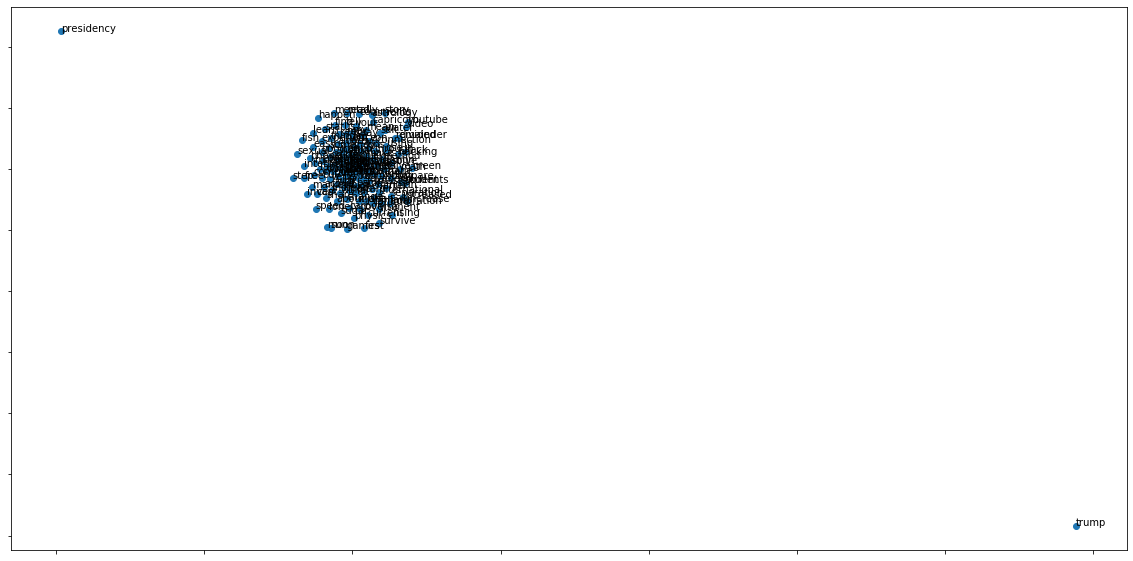

In [35]:
#Plot the t-SNE output
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = list(wanted_vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
_ = plt.show()

In [36]:
w1 = "phone"
model.wv.most_similar(positive=w1, topn=5)

[('mobile', 0.7854401469230652),
 ('phones', 0.7666906714439392),
 ('smartphone', 0.7493506669998169),
 ('iphone', 0.7275946140289307),
 ('device', 0.7189710140228271)]

In [37]:
w1 = ["women","rights"]
w2 = ["girls"]
model.wv.most_similar (positive=w1,negative=w2,topn=2)

[('equality', 0.5924725532531738), ('advocates', 0.5724838972091675)]